In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import optperfprofpy

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
problems = pd.Series([1, 1, 2, 2, 3, 3], dtype=int, name='problem')
methods = pd.Series(['A', 'B', 'A', 'B', 'A', 'B'], dtype=str, name='method')
objective_vals = pd.Series([2, 20, 25, 5, 30, 4], dtype=float, name='obj')

In [4]:
example_df = pd.DataFrame([problems, methods, objective_vals]).T

Number of problems per solver:  3


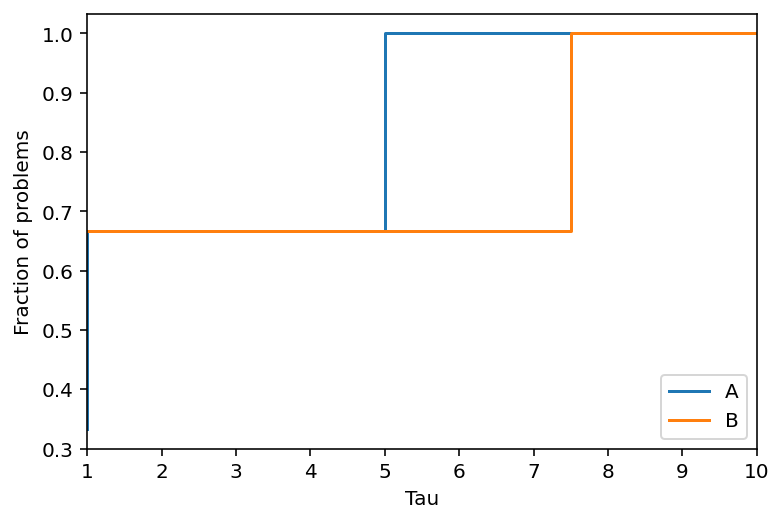

In [5]:
taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    example_df, ['problem'], ['obj'], ['method'])
optperfprofpy.draw_simple_pp(taus, solver_vals, solvers)

In [6]:
def my_draw_simple_pp(taus, solver_vals, solvers, ax,
        fname="performance_profiles.pdf"):
    """Simple step plotter for performance profiles.
    Parameters
    ----------
    taus : numpy.ndarray
        x values of plot.
    solver_vals : numpy.ndarray
        y values of plot.
    solvers : list
        Labels of curves.
    """

    # Add lines individually to support labels
    for n, solver in enumerate(solvers):
        ax.step(taus, solver_vals[n, :], alpha=0.5, label=solver)

    plt.legend(loc=4, frameon=False)
    plt.xlim(1, taus.max())
    #ax.set_xscale("log")
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\rho_{s}(\tau)$")

    plt.savefig(fname, bbox_inches='tight')
    plt.plot()

Number of problems per solver:  12


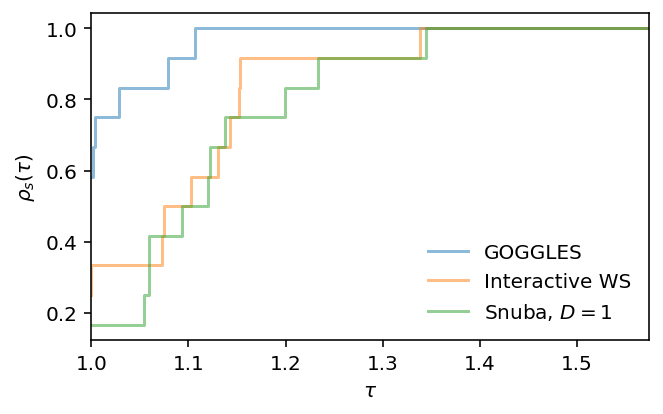

In [7]:
problems = pd.Series(
        np.arange(12).tolist() + \
        np.arange(12).tolist() + \
        np.arange(12).tolist(),
        # np.arange(12).tolist(), 
        dtype=int, name='problem')
methods = pd.Series(
        [r'GOGGLES'] * 12 + \
        [r'Snuba, $D=1$'] * 12 + \
        [r'Interactive WS'] * 12, 
        # [r'Supervised'] * 12, 
        dtype=str, name='method')
goggles_perfs = [
        0.3633, 0.4613, 0.2281,
        0.4441, 0.4524, 0.2951,
        0.2846, 0.3365, 0.2190,
        0.2880, 0.3523, 0.3009]
snuba_perfs = [
        0.2726, 0.2793, 0.1826, 
        0.3715, 0.1414, 0.1309,
        0.2834, 0.3311, 0.2409,
        0.3244, 0.3135, 0.2499,]
iws_perfs = [
        0.2363, 0.2759, 0.1100,
        0.3848, 0.4546, 0.1878,
        0.3612, 0.3934, 0.1808,
        0.2738, 0.3509, 0.2047,]
# sup_perfs = [
#         0.9, 0.8, 0.8,
#         0.8, 0.6, 0.7,
#         0.6, 0.7, 0.8,
#         0.6, 0.6, 0.7,]
objective_vals = pd.Series(
        1.0 - np.array(goggles_perfs + snuba_perfs + iws_perfs), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
my_draw_simple_pp(taus, solver_vals, solvers, ax,
        fname="performance_profiles_search.pdf")

Number of problems per solver:  9


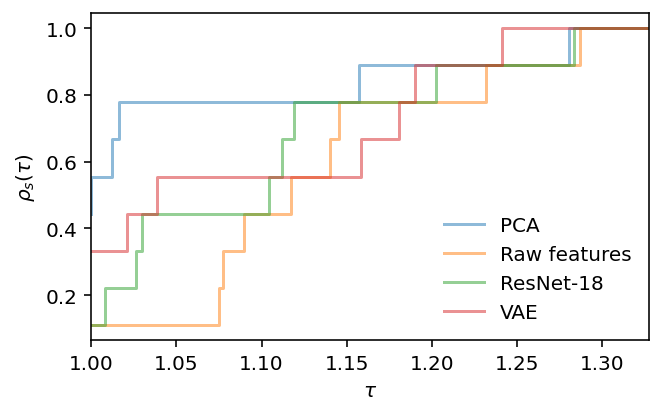

In [8]:
problems = pd.Series(
        np.arange(3).tolist() + \
        np.arange(3).tolist() + \
        np.arange(3).tolist() + \
        np.arange(3).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(3, 6).tolist() + \
        np.arange(6, 9).tolist() + \
        np.arange(6, 9).tolist() + \
        np.arange(6, 9).tolist() + \
        np.arange(6, 9).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        ([r'Raw features'] * 3 + \
        [r'PCA'] * 3 + \
        [r'ResNet-18'] * 3 + \
        [r'VAE'] * 3) * 3, 
        dtype=str, name='method')
goggles_perfs = [
        0.3633, 0.4613, 0.2281,
        0.4441, 0.4524, 0.2951,
        0.2846, 0.3365, 0.2190,
        0.2880, 0.3523, 0.3009]
snuba_perfs = [
        0.2726, 0.2793, 0.1826, 
        0.3715, 0.1414, 0.1309,
        0.2834, 0.3311, 0.2409,
        0.3244, 0.3135, 0.2499,]
iws_perfs = [
        0.2363, 0.2759, 0.1100,
        0.3848, 0.4546, 0.1878,
        0.3612, 0.3934, 0.1808,
        0.2738, 0.3509, 0.2047,]
# sup_perfs = [
#         0.9, 0.8, 0.8,
#         0.8, 0.6, 0.7,
#         0.6, 0.7, 0.8,
#         0.6, 0.6, 0.7,]
objective_vals = pd.Series(
        1.0 - np.array(goggles_perfs + snuba_perfs + iws_perfs), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
my_draw_simple_pp(taus, solver_vals, solvers, ax,
        fname="performance_profiles_emb.pdf")

In [9]:
df

,problem,method,obj
0,0,Raw features,0.6367
1,1,Raw features,0.5387
2,2,Raw features,0.7719
3,0,PCA,0.5559
4,1,PCA,0.5476
5,2,PCA,0.7049
6,0,ResNet-18,0.7154
7,1,ResNet-18,0.6635
8,2,ResNet-18,0.781
9,0,VAE,0.712


In [274]:
def my_draw_simple_pp(taus, solver_vals, solvers, ax,
        fname="performance_profiles.pdf", xlim=None, log=False, frameon=False, 
        colors=None, legend=True):
    """Simple step plotter for performance profiles.
    Parameters
    ----------
    taus : numpy.ndarray
        x values of plot.
    solver_vals : numpy.ndarray
        y values of plot.
    solvers : list
        Labels of curves.
    """

    if colors is None:
        colors = [f"C{i}" for i in range(10)]

    # Add lines individually to support labels
    for n, solver in enumerate(solvers):
        ax.step(taus, 
            solver_vals[n, :], alpha=0.5, linewidth=3, 
            label=solver, color=colors[n])

    if legend:
        ax.legend(frameon=frameon, loc='center left', bbox_to_anchor=(1, 0.5))
    if xlim == None:
        ax.set_xlim(1, taus.max())
    else:
        ax.set_xlim(1, xlim)
    if log:
        ax.set_xscale("log")
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\rho_{s}(\tau)$")


In [193]:


#axs[0]

Number of problems per solver:  16
Number of problems per solver:  20


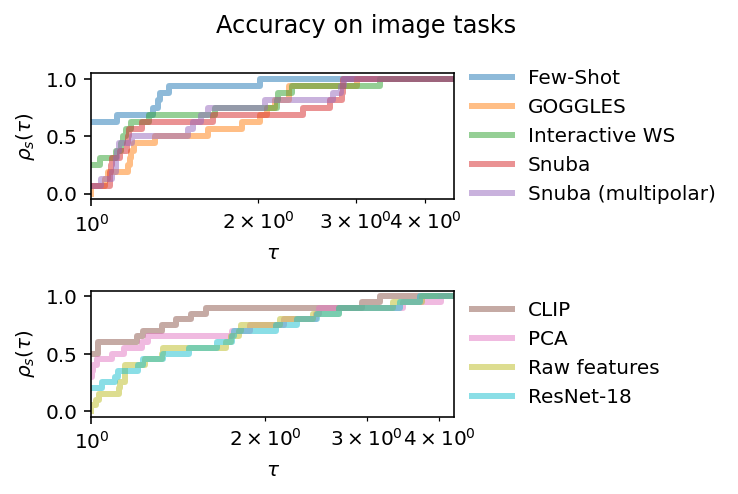

In [226]:
fig, axs = plt.subplots(2, 1, figsize=(5.25, 3.5))



ntotal_task = 7
nrows = 4
rowlist = [0, 1, 2, 3]
tasklist = [0, 1, 2, 3] #[0, 1, 2, 3, 4, 5, 6]
assert len(tasklist) <= 7
ntask = len(tasklist)
inds = np.array([[t + (ntotal_task * row) for t in tasklist] for row in rowlist]).reshape(-1).tolist()





goggles_perfs = [
        0.3778, 0.1697, 0.0897, 0.3778, 0.2710, 0.5284, 0.5283,
        0.4563, 0.1989, 0.1074, 0.4561, 0.2688, 0.4863, 0.6728,
        0.3258, 0.1768, 0.1192, 0.1894, 0.3127, 0.9353, 0.5312,
        0.3309, 0.5436, 0.1884, 0.1405, 0.0000, 0.7505, 0.0000,
]
iws_perfs = [
        0.4128, 0.1482, 0.1154, 0.3862, 0.2615, 0.5403, 0.4997,
        0.3503, 0.1047, 0.1283, 0.4970, 0.2687, 0.5155, 0.4777,
        0.0822, 0.2120, 0.1352, 0.5101, 0.4235, 0.7995, 0.7343,
        0.6885, 0.7892, 0.1108, 0.3495, 0.0000, 0.0000, 0.0000,

        ]
snuba_perfs = [
        0.2694, 0.1624, 0.0805, 0.2308, 0.2648, 0.5235, 0.7082,
        0.2313, 0.0924, 0.1526, 0.2640, 0.2598, 0.8811, 0.4905,
        0.4219, 0.1520, 0.1554, 0.1804, 0.2506, 0.9774, 0.6994,
        0.6617, 0.7550, 0.3103, 0.2419, 0.0000, 0.8414, 0.0000,
]
snub_multi_perfs = [
        0.2374, 0.1386, 0.0991, 0.2343, 0.2596, 0.5421, 0.7264,
        0.5625, 0.1390, 0.2354, 0.5625, 0.2644, 0.8968, 0.5143,
        0.3866, 0.2036, 0.1588, 0.2283, 0.3702, 0.9742, 0.7559,
        0.3541, 0.6788, 0.2479, 0.2785, 0.0000, 0.7916, 0.0000,
]
sup_perfs = [
        0.7295, 0.2315, 0.1496, 0.7295, 0.2583, 0.6316, 0.6517,
        0.7306, 0.2262, 0.1483, 0.7305, 0.2548, 0.7863, 0.7488,
        0.7966, 0.3335, 0.2544, 0.3485, 0.4700, 0.9900, 0.5329,
        0.3579, 0.6857, 0.1011, 0.1009, 0.0000, 0.7658, 0.0000,
]

goggles_perfs = np.array(goggles_perfs)[inds].tolist()
iws_perfs = np.array(iws_perfs)[inds].tolist()
snuba_perfs = np.array(snuba_perfs)[inds].tolist()
snub_multi_perfs = np.array(snub_multi_perfs)[inds].tolist()
sup_perfs = np.array(sup_perfs)[inds].tolist()

problems = pd.Series(
        np.arange(len(goggles_perfs)).tolist() + \
        np.arange(len(iws_perfs)).tolist() + \
        np.arange(len(snuba_perfs)).tolist() + \
        np.arange(len(snub_multi_perfs)).tolist() + \
        np.arange(len(sup_perfs)).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        [r'GOGGLES'] * len(goggles_perfs) + \
        [r'Interactive WS'] * len(iws_perfs) + \
        [r'Snuba'] * len(snuba_perfs) + \
        [r'Snuba (multipolar)'] * len(snub_multi_perfs) + \
        [r'Few-Shot'] * len(sup_perfs),
        dtype=str, name='method')


objective_vals = pd.Series(
        1.0 - np.array(
                goggles_perfs + \
                iws_perfs + \
                snuba_perfs + \
                snub_multi_perfs + \
                sup_perfs
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[0], 
        xlim=None, log=True, frameon=False)








# TODO index into each of the above by task

problems = pd.Series(
        np.arange(0*ntask, 0*ntask+ntask).tolist() * 4 + \
        np.arange(1*ntask, 1*ntask+ntask).tolist() * 4 + \
        np.arange(2*ntask, 2*ntask+ntask).tolist() * 4 + \
        np.arange(3*ntask, 3*ntask+ntask).tolist() * 4 + \
        np.arange(4*ntask, 4*ntask+ntask).tolist() * 4,
        dtype=int, name='problem')
methods = pd.Series(
        ([r'Raw features'] * ntask + \
        [r'PCA'] * ntask + \
        [r'ResNet-18'] * ntask + \
        [r'CLIP'] * ntask) * 5,
        dtype=str, name='method')


objective_vals = pd.Series(
        1 - np.array(
                goggles_perfs + \
                iws_perfs + \
                snuba_perfs + \
                snub_multi_perfs + \
                sup_perfs
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[1], 
        xlim=None, log=True, frameon=False, colors=[
                f"C{i}" for i in [5, 6, 8, 9]])


plt.suptitle('Accuracy on image tasks')

plt.tight_layout()
plt.savefig("neurips/perf_all_image_tasks.pdf")
plt.show()


Number of problems per solver:  12
Number of problems per solver:  15


/hdd2/nick/github.com/Kaylee0501/FWRENCH/optperfprofpy.py:185: UserWarning: Solvers do not solve 100% of problems. Total amount of problems solved: 166.66666666666669
  "Total amount of problems solved: {}".format(100 * solver_taus[:, 0].sum())


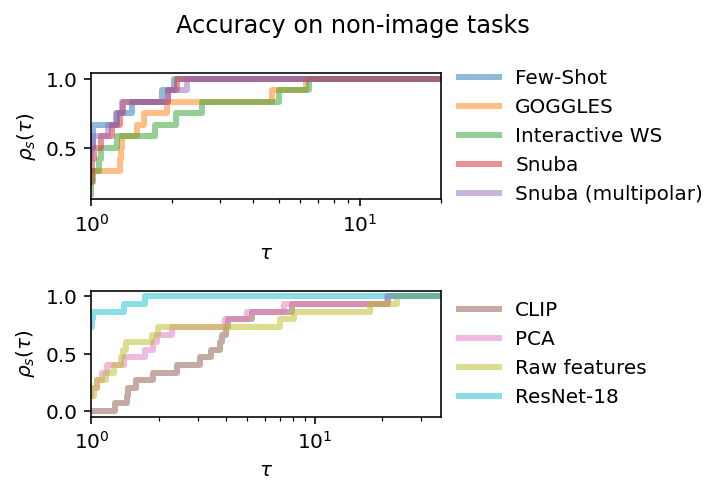

In [235]:
fig, axs = plt.subplots(2, 1, figsize=(5.25, 3.5))



ntotal_task = 7
nrows = 4
rowlist = [0, 1, 2, 3]
tasklist = [4, 5, 6] #[0, 1, 2, 3, 4, 5, 6]
assert len(tasklist) <= 7
ntask = len(tasklist)
inds = np.array([[t + (ntotal_task * row) for t in tasklist] for row in rowlist]).reshape(-1).tolist()





goggles_perfs = [
        0.3778, 0.1697, 0.0897, 0.3778, 0.2710, 0.5284, 0.5283,
        0.4563, 0.1989, 0.1074, 0.4561, 0.2688, 0.4863, 0.6728,
        0.3258, 0.1768, 0.1192, 0.1894, 0.3127, 0.9353, 0.5312,
        0.3309, 0.5436, 0.1884, 0.1405, 0.0000, 0.7505, 0.0000,
]
iws_perfs = [
        0.4128, 0.1482, 0.1154, 0.3862, 0.2615, 0.5403, 0.4997,
        0.3503, 0.1047, 0.1283, 0.4970, 0.2687, 0.5155, 0.4777,
        0.0822, 0.2120, 0.1352, 0.5101, 0.4235, 0.7995, 0.7343,
        0.6885, 0.7892, 0.1108, 0.3495, 0.0000, 0.0000, 0.0000,

        ]
snuba_perfs = [
        0.2694, 0.1624, 0.0805, 0.2308, 0.2648, 0.5235, 0.7082,
        0.2313, 0.0924, 0.1526, 0.2640, 0.2598, 0.8811, 0.4905,
        0.4219, 0.1520, 0.1554, 0.1804, 0.2506, 0.9774, 0.6994,
        0.6617, 0.7550, 0.3103, 0.2419, 0.0000, 0.8414, 0.0000,
]
snub_multi_perfs = [
        0.2374, 0.1386, 0.0991, 0.2343, 0.2596, 0.5421, 0.7264,
        0.5625, 0.1390, 0.2354, 0.5625, 0.2644, 0.8968, 0.5143,
        0.3866, 0.2036, 0.1588, 0.2283, 0.3702, 0.9742, 0.7559,
        0.3541, 0.6788, 0.2479, 0.2785, 0.0000, 0.7916, 0.0000,
]
sup_perfs = [
        0.7295, 0.2315, 0.1496, 0.7295, 0.2583, 0.6316, 0.6517,
        0.7306, 0.2262, 0.1483, 0.7305, 0.2548, 0.7863, 0.7488,
        0.7966, 0.3335, 0.2544, 0.3485, 0.4700, 0.9900, 0.5329,
        0.3579, 0.6857, 0.1011, 0.1009, 0.0000, 0.7658, 0.0000,
]

goggles_perfs = np.array(goggles_perfs)[inds].tolist()
iws_perfs = np.array(iws_perfs)[inds].tolist()
snuba_perfs = np.array(snuba_perfs)[inds].tolist()
snub_multi_perfs = np.array(snub_multi_perfs)[inds].tolist()
sup_perfs = np.array(sup_perfs)[inds].tolist()

problems = pd.Series(
        np.arange(len(goggles_perfs)).tolist() + \
        np.arange(len(iws_perfs)).tolist() + \
        np.arange(len(snuba_perfs)).tolist() + \
        np.arange(len(snub_multi_perfs)).tolist() + \
        np.arange(len(sup_perfs)).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        [r'GOGGLES'] * len(goggles_perfs) + \
        [r'Interactive WS'] * len(iws_perfs) + \
        [r'Snuba'] * len(snuba_perfs) + \
        [r'Snuba (multipolar)'] * len(snub_multi_perfs) + \
        [r'Few-Shot'] * len(sup_perfs),
        dtype=str, name='method')


objective_vals = pd.Series(
        1.0 - np.array(
                goggles_perfs + \
                iws_perfs + \
                snuba_perfs + \
                snub_multi_perfs + \
                sup_perfs
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[0], 
        xlim=None, log=True, frameon=False)








# TODO index into each of the above by task

problems = pd.Series(
        np.arange(0*ntask, 0*ntask+ntask).tolist() * 4 + \
        np.arange(1*ntask, 1*ntask+ntask).tolist() * 4 + \
        np.arange(2*ntask, 2*ntask+ntask).tolist() * 4 + \
        np.arange(3*ntask, 3*ntask+ntask).tolist() * 4 + \
        np.arange(4*ntask, 4*ntask+ntask).tolist() * 4,
        dtype=int, name='problem')
methods = pd.Series(
        ([r'Raw features'] * ntask + \
        [r'PCA'] * ntask + \
        [r'ResNet-18'] * ntask + \
        [r'CLIP'] * ntask) * 5,
        dtype=str, name='method')


objective_vals = pd.Series(
        1 - np.array(
                goggles_perfs + \
                iws_perfs + \
                snuba_perfs + \
                snub_multi_perfs + \
                sup_perfs
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[1], 
        xlim=None, log=True, frameon=False, colors=[
                f"C{i}" for i in [5, 6, 8, 9]])


plt.suptitle('Accuracy on non-image tasks')

plt.tight_layout()
plt.savefig("neurips/perf_all_nonimage_tasks.pdf")
plt.show()


# Coverage analysis

Number of problems per solver:  16
Number of problems per solver:  12


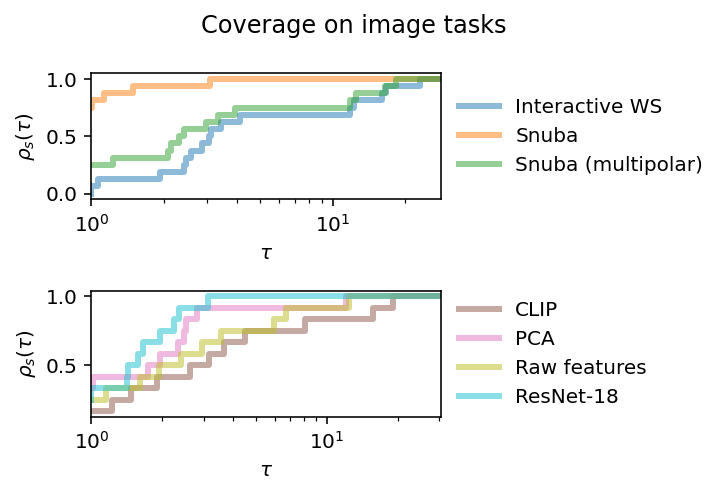

In [231]:
fig, axs = plt.subplots(2, 1, figsize=(5.25, 3.5))



ntotal_task = 7
nrows = 4
rowlist = [0, 1, 2, 3]
tasklist = [0, 1, 2, 3] #[0, 1, 2, 3, 4, 5, 6]
assert len(tasklist) <= 7
ntask = len(tasklist)
inds = np.array([[t + (ntotal_task * row) for t in tasklist] for row in rowlist]).reshape(-1).tolist()





iws_perfs = [
        0.3617, 0.4616, 0.3666, 0.3656, 0.5125, 0.8163, 0.9999,
        0.5107, 0.2731, 0.2696, 0.4797, 0.5448, 0.9874, 0.8873,
        0.7422, 0.3580, 0.0917, 0.1631, 0.6109, 0.9999, 0.6142,
        0.2758, 0.7239, 0.0993, 0.1757, 0.0000, 0.0000, 0.0000,
]
snuba_perfs = [
        0.6842, 0.6409, 0.8387, 0.8105, 0.9090, 0.5379, 0.9999,
        0.9608, 0.7183, 0.9557, 0.9716, 0.9956, 0.9999, 0.8072,
        0.8761, 0.9772, 0.9230, 0.9320, 0.8998, 0.9999, 0.5912 ,
        0.7667, 0.7262, 0.1521, 0.1323, 0.0000, 0.4116, 0.0000,
        ]
snub_multi_perfs = [
        0.7422, 0.8129, 0.4470, 0.5407, 0.9999, 0.9999, 0.9999,
        0.3472, 0.5807, 0.4763, 0.3472, 0.9999, 0.9999, 0.9999,
        0.6185, 0.6337, 0.8232, 0.7193, 0.9999, 0.9999, 0.9999,
        0.5027, 0.3372, 0.2033, 0.7235, 0.0000, 0.9999, 0.0000,
]


iws_perfs = np.array(iws_perfs)[inds].tolist()
snuba_perfs = np.array(snuba_perfs)[inds].tolist()
snub_multi_perfs = np.array(snub_multi_perfs)[inds].tolist()

problems = pd.Series(
        np.arange(len(iws_perfs)).tolist() + \
        np.arange(len(snuba_perfs)).tolist() + \
        np.arange(len(snub_multi_perfs)).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        [r'Interactive WS'] * len(iws_perfs) + \
        [r'Snuba'] * len(snuba_perfs) + \
        [r'Snuba (multipolar)'] * len(snub_multi_perfs),
        dtype=str, name='method')


objective_vals = pd.Series(
        1.0 - np.array(
                iws_perfs + \
                snuba_perfs + \
                snub_multi_perfs,
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[0], 
        xlim=None, log=True, frameon=False)








# TODO index into each of the above by task

problems = pd.Series(
        np.arange(0*ntask, 0*ntask+ntask).tolist() * 4 + \
        np.arange(1*ntask, 1*ntask+ntask).tolist() * 4 + \
        np.arange(2*ntask, 2*ntask+ntask).tolist() * 4,
        dtype=int, name='problem')
methods = pd.Series(
        ([r'Raw features'] * ntask + \
        [r'PCA'] * ntask + \
        [r'ResNet-18'] * ntask + \
        [r'CLIP'] * ntask) * 3,
        dtype=str, name='method')


objective_vals = pd.Series(
        1 - np.array(
                iws_perfs + \
                snuba_perfs + \
                snub_multi_perfs,
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[1], 
        xlim=None, log=True, frameon=False, colors=[
                f"C{i}" for i in [5, 6, 8, 9]])


plt.suptitle('Coverage on image tasks')

plt.tight_layout()
plt.savefig("neurips/perf_coverage_all_image_tasks.pdf")
plt.show()


Number of problems per solver:  12
Number of problems per solver:  9


/hdd2/nick/github.com/Kaylee0501/FWRENCH/optperfprofpy.py:185: UserWarning: Solvers do not solve 100% of problems. Total amount of problems solved: 175.0
  "Total amount of problems solved: {}".format(100 * solver_taus[:, 0].sum())
/hdd2/nick/github.com/Kaylee0501/FWRENCH/optperfprofpy.py:185: UserWarning: Solvers do not solve 100% of problems. Total amount of problems solved: 188.88888888888889
  "Total amount of problems solved: {}".format(100 * solver_taus[:, 0].sum())


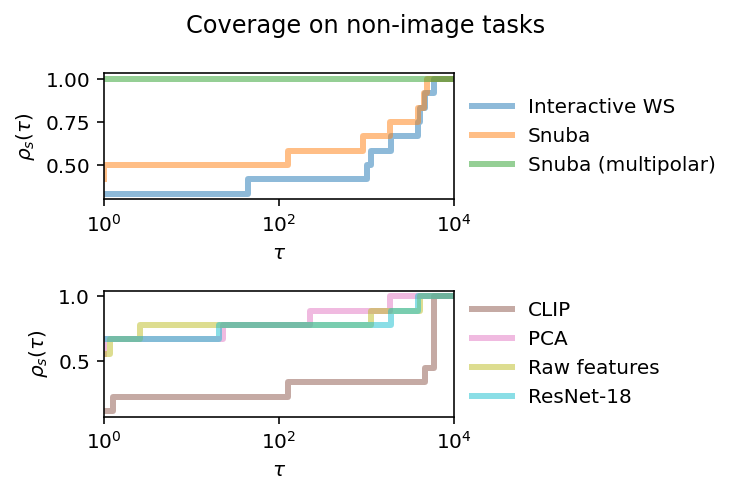

In [232]:
fig, axs = plt.subplots(2, 1, figsize=(5.25, 3.5))



ntotal_task = 7
nrows = 4
rowlist = [0, 1, 2, 3]
tasklist = [4, 5, 6] #[0, 1, 2, 3, 4, 5, 6]
assert len(tasklist) <= 7
ntask = len(tasklist)
inds = np.array([[t + (ntotal_task * row) for t in tasklist] for row in rowlist]).reshape(-1).tolist()





iws_perfs = [
        0.3617, 0.4616, 0.3666, 0.3656, 0.5125, 0.8163, 0.9999,
        0.5107, 0.2731, 0.2696, 0.4797, 0.5448, 0.9874, 0.8873,
        0.7422, 0.3580, 0.0917, 0.1631, 0.6109, 0.9999, 0.6142,
        0.2758, 0.7239, 0.0993, 0.1757, 0.0000, 0.0000, 0.0000,
]
snuba_perfs = [
        0.6842, 0.6409, 0.8387, 0.8105, 0.9090, 0.5379, 0.9999,
        0.9608, 0.7183, 0.9557, 0.9716, 0.9956, 0.9999, 0.8072,
        0.8761, 0.9772, 0.9230, 0.9320, 0.8998, 0.9999, 0.5912 ,
        0.7667, 0.7262, 0.1521, 0.1323, 0.0000, 0.4116, 0.0000,
        ]
snub_multi_perfs = [
        0.7422, 0.8129, 0.4470, 0.5407, 0.9999, 0.9999, 0.9999,
        0.3472, 0.5807, 0.4763, 0.3472, 0.9999, 0.9999, 0.9999,
        0.6185, 0.6337, 0.8232, 0.7193, 0.9999, 0.9999, 0.9999,
        0.5027, 0.3372, 0.2033, 0.7235, 0.0000, 0.9999, 0.0000,
]


iws_perfs = np.array(iws_perfs)[inds].tolist()
snuba_perfs = np.array(snuba_perfs)[inds].tolist()
snub_multi_perfs = np.array(snub_multi_perfs)[inds].tolist()

problems = pd.Series(
        np.arange(len(iws_perfs)).tolist() + \
        np.arange(len(snuba_perfs)).tolist() + \
        np.arange(len(snub_multi_perfs)).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        [r'Interactive WS'] * len(iws_perfs) + \
        [r'Snuba'] * len(snuba_perfs) + \
        [r'Snuba (multipolar)'] * len(snub_multi_perfs),
        dtype=str, name='method')


objective_vals = pd.Series(
        1.0 - np.array(
                iws_perfs + \
                snuba_perfs + \
                snub_multi_perfs,
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[0], 
        xlim=None, log=True, frameon=False)








# TODO index into each of the above by task

problems = pd.Series(
        np.arange(0*ntask, 0*ntask+ntask).tolist() * 4 + \
        np.arange(1*ntask, 1*ntask+ntask).tolist() * 4 + \
        np.arange(2*ntask, 2*ntask+ntask).tolist() * 4,
        dtype=int, name='problem')
methods = pd.Series(
        ([r'Raw features'] * ntask + \
        [r'PCA'] * ntask + \
        [r'ResNet-18'] * ntask + \
        [r'CLIP'] * ntask) * 3,
        dtype=str, name='method')


objective_vals = pd.Series(
        1 - np.array(
                iws_perfs + \
                snuba_perfs + \
                snub_multi_perfs,
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[1], 
        xlim=None, log=True, frameon=False, colors=[
                f"C{i}" for i in [5, 6, 8, 9]])


plt.suptitle('Coverage on non-image tasks')

plt.tight_layout()
plt.savefig("neurips/perf_coverage_all_non_image_tasks.pdf")
plt.show()


# Cardinality analysis

Number of problems per solver:  5


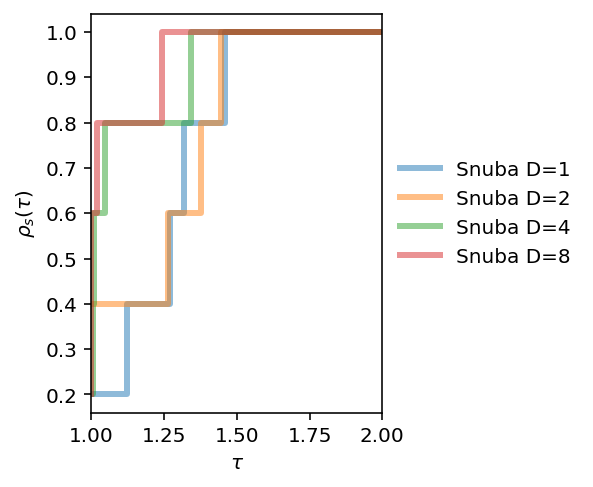

In [327]:
fig, axs = plt.subplots(1, 1, figsize=(4.25, 3.5))



ntotal_task = 7
nrows = 4
rowlist = [0]
tasklist = [0, 1, 2, 3, 4]
assert len(tasklist) <= 5
ntask = len(tasklist)
inds = np.array([[t + (ntotal_task * row) for t in tasklist] for row in rowlist]).reshape(-1).tolist()





snuba1_perfs = [
        0.7667, 0.7262, 0.1521, 0.1323, 0.4116,
        ]

snuba2_perfs = [
        0.7033, 0.7025, 0.0714, 0.3016, 0.79157
        ]

snuba4_perfs = [
        0.6788, 0.79610, 0.3506, 0.2164, 0.7878
        ]

snuba8_perfs = [
        0.7051, 0.79479, 0.3577, 0.2678, 0.7915
        ]

snuba10_perfs = [
        0.68718, 0.79479, 0.3605, 0.2321, 0.79157
        ]



snuba1_perfs = np.array(snuba1_perfs)[inds].tolist()
snuba2_perfs = np.array(snuba2_perfs)[inds].tolist()
snuba4_perfs = np.array(snuba4_perfs)[inds].tolist()
snuba8_perfs = np.array(snuba8_perfs)[inds].tolist()
#snuba10_perfs = np.array(snuba10_perfs)[inds].tolist()

problems = pd.Series(
        np.arange(len(snuba1_perfs)).tolist() + \
        np.arange(len(snuba2_perfs)).tolist() + \
        np.arange(len(snuba4_perfs)).tolist() + \
        np.arange(len(snuba8_perfs)).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        [r'Snuba D=1'] * len(snuba1_perfs) + \
        [r'Snuba D=2'] * len(snuba2_perfs) + \
        [r'Snuba D=4'] * len(snuba4_perfs) + \
        [r'Snuba D=8'] * len(snuba8_perfs),
        dtype=str, name='method')


objective_vals = pd.Series(
        1.0 - np.array(
                snuba1_perfs + \
                snuba2_perfs + \
                snuba4_perfs + \
                snuba8_perfs,
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs, 
        xlim=2, log=False, frameon=False)












#plt.suptitle('Coverage on all tasks')

plt.tight_layout()
plt.savefig("neurips/snuba_cardinality.pdf")
plt.show()


# Polarity analysis

Number of problems per solver:  16
Number of problems per solver:  16
Number of problems per solver:  12
Number of problems per solver:  12


/hdd2/nick/github.com/Kaylee0501/FWRENCH/optperfprofpy.py:185: UserWarning: Solvers do not solve 100% of problems. Total amount of problems solved: 116.66666666666667
  "Total amount of problems solved: {}".format(100 * solver_taus[:, 0].sum())
/hdd2/nick/github.com/Kaylee0501/FWRENCH/optperfprofpy.py:185: UserWarning: Solvers do not solve 100% of problems. Total amount of problems solved: 141.66666666666669
  "Total amount of problems solved: {}".format(100 * solver_taus[:, 0].sum())


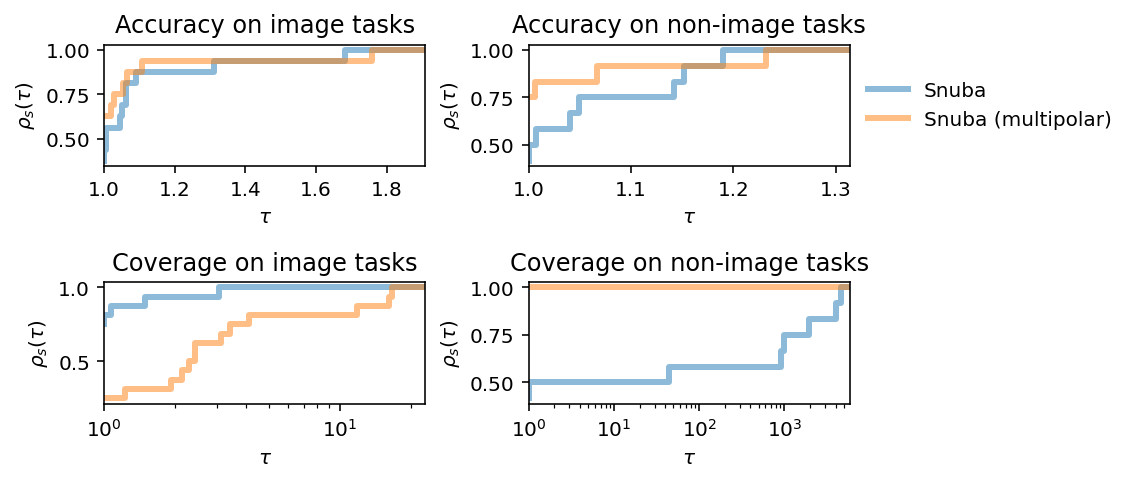

In [296]:
fig, axs = plt.subplots(2, 2, figsize=(8, 3.5))



ntotal_task = 7
nrows = 4
rowlist = [0, 1, 2, 3]
tasklist = [0, 1, 2, 3]
assert len(tasklist) <= 7
ntask = len(tasklist)
inds = np.array([[t + (ntotal_task * row) for t in tasklist] for row in rowlist]).reshape(-1).tolist()





snuba_perfs = [
        0.2694, 0.1624, 0.0805, 0.2308, 0.2648, 0.5235, 0.7082,
        0.2313, 0.0924, 0.1526, 0.2640, 0.2598, 0.8811, 0.4905,
        0.4219, 0.1520, 0.1554, 0.1804, 0.2506, 0.9774, 0.6994,
        0.6617, 0.7550, 0.3103, 0.2419, 0.0000, 0.8414, 0.0000,
]
snub_multi_perfs = [
        0.2374, 0.1386, 0.0991, 0.2343, 0.2596, 0.5421, 0.7264,
        0.5625, 0.1390, 0.2354, 0.5625, 0.2644, 0.8968, 0.5143,
        0.3866, 0.2036, 0.1588, 0.2283, 0.3702, 0.9742, 0.7559,
        0.3541, 0.6788, 0.2479, 0.2785, 0.0000, 0.7916, 0.0000,
]

snuba_perfs = np.array(snuba_perfs)[inds].tolist()
snub_multi_perfs = np.array(snub_multi_perfs)[inds].tolist()

problems = pd.Series(
        np.arange(len(snuba_perfs)).tolist() + \
        np.arange(len(snub_multi_perfs)).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        [r'Snuba'] * len(snuba_perfs) + \
        [r'Snuba (multipolar)'] * len(snub_multi_perfs),
        dtype=str, name='method')


objective_vals = pd.Series(
        1.0 - np.array(
                snuba_perfs + \
                snub_multi_perfs,
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[0, 0], 
        xlim=None, log=False, frameon=False, legend=False)





snuba_perfs = [
        0.6842, 0.6409, 0.8387, 0.8105, 0.9090, 0.5379, 0.9999,
        0.9608, 0.7183, 0.9557, 0.9716, 0.9956, 0.9999, 0.8072,
        0.8761, 0.9772, 0.9230, 0.9320, 0.8998, 0.9999, 0.5912 ,
        0.7667, 0.7262, 0.1521, 0.1323, 0.0000, 0.4116, 0.0000,
        ]
snub_multi_perfs = [
        0.7422, 0.8129, 0.4470, 0.5407, 0.9999, 0.9999, 0.9999,
        0.3472, 0.5807, 0.4763, 0.3472, 0.9999, 0.9999, 0.9999,
        0.6185, 0.6337, 0.8232, 0.7193, 0.9999, 0.9999, 0.9999,
        0.5027, 0.3372, 0.2033, 0.7235, 0.0000, 0.9999, 0.0000,
]

snuba_perfs = np.array(snuba_perfs)[inds].tolist()
snub_multi_perfs = np.array(snub_multi_perfs)[inds].tolist()

problems = pd.Series(
        np.arange(len(snuba_perfs)).tolist() + \
        np.arange(len(snub_multi_perfs)).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        [r'Snuba'] * len(snuba_perfs) + \
        [r'Snuba (multipolar)'] * len(snub_multi_perfs),
        dtype=str, name='method')


objective_vals = pd.Series(
        1.0 - np.array(
                snuba_perfs + \
                snub_multi_perfs,
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[1, 0], 
        xlim=None, log=True, frameon=False, legend=False)

        







ntotal_task = 7
nrows = 4
rowlist = [0, 1, 2, 3]
tasklist = [4, 5, 6]
assert len(tasklist) <= 7
ntask = len(tasklist)
inds = np.array([[t + (ntotal_task * row) for t in tasklist] for row in rowlist]).reshape(-1).tolist()





snuba_perfs = [
        0.2694, 0.1624, 0.0805, 0.2308, 0.2648, 0.5235, 0.7082,
        0.2313, 0.0924, 0.1526, 0.2640, 0.2598, 0.8811, 0.4905,
        0.4219, 0.1520, 0.1554, 0.1804, 0.2506, 0.9774, 0.6994,
        0.6617, 0.7550, 0.3103, 0.2419, 0.0000, 0.8414, 0.0000,
]
snub_multi_perfs = [
        0.2374, 0.1386, 0.0991, 0.2343, 0.2596, 0.5421, 0.7264,
        0.5625, 0.1390, 0.2354, 0.5625, 0.2644, 0.8968, 0.5143,
        0.3866, 0.2036, 0.1588, 0.2283, 0.3702, 0.9742, 0.7559,
        0.3541, 0.6788, 0.2479, 0.2785, 0.0000, 0.7916, 0.0000,
]

snuba_perfs = np.array(snuba_perfs)[inds].tolist()
snub_multi_perfs = np.array(snub_multi_perfs)[inds].tolist()

problems = pd.Series(
        np.arange(len(snuba_perfs)).tolist() + \
        np.arange(len(snub_multi_perfs)).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        [r'Snuba'] * len(snuba_perfs) + \
        [r'Snuba (multipolar)'] * len(snub_multi_perfs),
        dtype=str, name='method')


objective_vals = pd.Series(
        1.0 - np.array(
                snuba_perfs + \
                snub_multi_perfs,
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[0, 1], 
        xlim=None, log=False, frameon=False)





snuba_perfs = [
        0.6842, 0.6409, 0.8387, 0.8105, 0.9090, 0.5379, 0.9999,
        0.9608, 0.7183, 0.9557, 0.9716, 0.9956, 0.9999, 0.8072,
        0.8761, 0.9772, 0.9230, 0.9320, 0.8998, 0.9999, 0.5912 ,
        0.7667, 0.7262, 0.1521, 0.1323, 0.0000, 0.4116, 0.0000,
        ]
snub_multi_perfs = [
        0.7422, 0.8129, 0.4470, 0.5407, 0.9999, 0.9999, 0.9999,
        0.3472, 0.5807, 0.4763, 0.3472, 0.9999, 0.9999, 0.9999,
        0.6185, 0.6337, 0.8232, 0.7193, 0.9999, 0.9999, 0.9999,
        0.5027, 0.3372, 0.2033, 0.7235, 0.0000, 0.9999, 0.0000,
]

snuba_perfs = np.array(snuba_perfs)[inds].tolist()
snub_multi_perfs = np.array(snub_multi_perfs)[inds].tolist()

problems = pd.Series(
        np.arange(len(snuba_perfs)).tolist() + \
        np.arange(len(snub_multi_perfs)).tolist(),
        dtype=int, name='problem')
methods = pd.Series(
        [r'Snuba'] * len(snuba_perfs) + \
        [r'Snuba (multipolar)'] * len(snub_multi_perfs),
        dtype=str, name='method')


objective_vals = pd.Series(
        1.0 - np.array(
                snuba_perfs + \
                snub_multi_perfs,
                ), 
        dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T

taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])


my_draw_simple_pp(
        taus, solver_vals, solvers, axs[1, 1], 
        xlim=None, log=True, frameon=False, legend=False)

        





axs[0, 0].set_title('Accuracy on image tasks')
axs[1, 0].set_title('Coverage on image tasks')

axs[0, 1].set_title('Accuracy on non-image tasks')
axs[1, 1].set_title('Coverage on non-image tasks')

plt.tight_layout()
plt.savefig("neurips/snuba_polarity.pdf", bbox_inches='tight')
plt.show()

